<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/BoltztrapExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 798kB 2.8MB/s 
     |████████████████████████████████| 296kB 14.3MB/s 


In [47]:
!git clone https://github.com/usnistgov/jarvis.git

Cloning into 'jarvis'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 5492 (delta 223), reused 155 (delta 64), pack-reused 5108
Receiving objects: 100% (5492/5492), 159.92 MiB | 23.35 MiB/s, done.
Resolving deltas: 100% (3243/3243), done.
Checking out files: 100% (1260/1260), done.


Text(0, 0.5, 'Seebeck coeff. ($\\mu$V/K)')

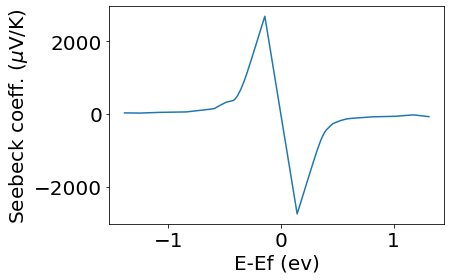

In [109]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 20})
from jarvis.io.boltztrap.outputs import BoltzTrapOutput
dir = 'jarvis/jarvis/examples/vasp/SiOptb88/MAIN-RELAX-bulk@mp_149/boltztrap'
b = BoltzTrapOutput(dir).read_condtens_fixdoping()

doping=['n','p']
temperature=300
mu=[]
seebeck=[]
conductivity=[]
kappa=[]
for d in doping:

  for i,j in b[d][temperature].items():
    mu.append(j['Ef'])
    s_tens=np.array(j['seeb']).reshape(3,3).trace()
    c_tens=np.array(j['cond']).reshape(3,3).trace()
    k_tens=np.array(j['kappa']).reshape(3,3).trace()
    seebeck.append(s_tens)
    conductivity.append(c_tens)
    kappa.append(k_tens)
mu=np.array(mu)
seebeck=np.array(seebeck)
conductivity=np.array(conductivity)
kappa=np.array(kappa)
order=np.argsort(mu)
mu=mu[order]
seebeck=seebeck[order]
conductivity=conductivity[order]
kappa=mu[order]

plt.plot(mu,1e6*seebeck)
plt.xlabel('E-Ef (ev)')
plt.ylabel('Seebeck coeff. ($\mu$V/K)')
#plt.xlim([-.5,1])
